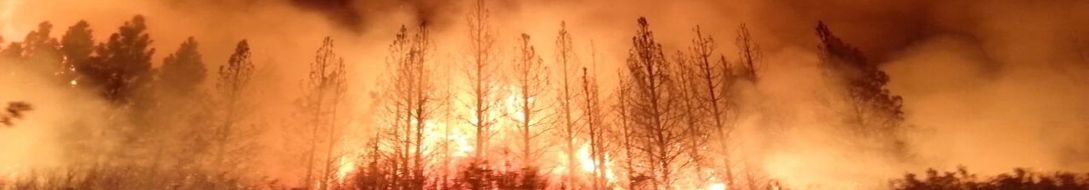

# Simulação metódos de Monte Carlo
## Propagação de incêndios 

<b>Professora Filomena Santos<b>

Simulação da propagação de um incêncio, considerando diversos fatores
tais como humidade, direção e velocidade do vento, diferenets tipos de vegetação e existência de um 
corta fogo ou lago/lagoa na frente de desenvolvimento de um incêndio.


Antonio Caramelo MEF

Gonçalo Gouveia MEF
    

# Modelo 
Utilizamos um modelo celular em que uma célula a arder se torna uma célula vazia (terra) e se uma célula adjacente é uma árvore há uma probabilidade de esta se tornar uma célula a arder.

A probabilidade de ignição de uma árvore adjacente depende das diferentes variáveis a ter em conta como direção e magnitude do vento, humidade e tipo de árvore.

Foi criada uma grelha de forma a simular uma floresta, com árvores mas também espaços vazios como clareiras.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import colors
import imageio
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider

# Cell States
# 0 = Clear, 1 = Fuel, 2 = Fire

prob = .8 # probability of a cell being fuel, otherwise it's clear

# Tempo de simulação / nr de iterações 
total_time = 300 # simulation time

# Tamanho da imagem (grelha)
terrain_size = [100,100] # size of the simulation: 10000 cells



# Humidade

In [2]:
'''
quanto maior for a humidade no ar menor ser a probabiblidade de 
o incêndio aumentar de proporções

deflaut set to 0% humidity
'''

def humidity(percentage=0):
    if random.random()>percentage:              # Quanto maior a percentagem de humidade menor a probabilidade de fogo alastrar
        return 1
    else:
        return 0
        

print(humidity(0.3))


1


# Main c/ Humidade

In [3]:
 def main(total_time,terrain_size,air_humidity=0):
    states = np.zeros((total_time,*terrain_size))
    # initialize states by creating random fuel and clear cells
    states[0] = np.random.choice([0,1],size=terrain_size,p=[1-prob,prob])


    # set the middle cell on fire!!!
    states[0,terrain_size[0]//2,terrain_size[1]//2] = 2

    for t in range(1,total_time):
    # Make a copy of the original states
        states[t] = states[t-1].copy()

        for x in range(1,terrain_size[0]-1):
            for y in range(1,terrain_size[1]-1):

                if states[t-1,x,y] == 2: # It's on fire
                    states[t,x,y] = 0 # Put it out and clear it

                    # If there's fuel surrounding it
                    # set it on fire!
                    if states[t-1,x+1,y] == 1 and humidity(air_humidity) == 1: 
                        states[t,x+1,y] = 2
                    if states[t-1,x-1,y] == 1 and humidity(air_humidity) == 1:
                        states[t,x-1,y] = 2
                    if states[t-1,x,y+1] == 1 and humidity(air_humidity) == 1:
                        states[t,x,y+1] = 2
                    if states[t-1,x,y-1] == 1 and humidity(air_humidity) == 1:
                        states[t,x,y-1] = 2

    #colored = np.zeros((total_time,*terrain_size,3),dtype=np.uint8)
    return states

# Plot Humidade

In [49]:
colored = np.zeros((total_time,*terrain_size,3),dtype=np.uint8)

states= main(total_time,terrain_size,0.3)

for t in range(states.shape[0]):
    for x in range(states[t].shape[0]):
            for y in range(states[t].shape[1]):
                value = states[t,x,y].copy()

                if value == 0:
                    colored[t,x,y] = [139,69,19] # Clear
                elif value == 1:
                    colored[t,x,y] = [0,255,0]   # Fuel
                elif value == 2:
                    colored[t,x,y] = [255,0,0]   # Burning


#cropped = colored[:200,1:terrain_size[0]-1,1:terrain_size[1]-1]

imageio.mimsave('./video.gif', colored)

### Conta células de cada tipo em cada iteração

In [7]:

# Cell States
# 0 = Clear, 1 = Fuel, 2 = Fire
def time_variation(states,time):
    fuel=np.count_nonzero(states[time] == 1)
    clear=np.count_nonzero(states[time] == 0)
    flame=np.count_nonzero(states[time] == 2)

    #print(clear+flame+fuel)
    return clear,fuel,flame


### Main para fazer o plot da evolução de cada tipo de célula ao longo de cada iteração

In [8]:
def plot_main(states,air_humidity=0,fire=True,ratio = False):
    clear = []
    fuel= []
    flame =[]
    for i in range(300):
        clear.append(time_variation(states,i)[0])
        fuel.append(time_variation(states,i)[1])
        flame.append(time_variation(states,i)[2])

    #plt.figure()
    plt.plot(clear,'lightsalmon',label='clear')
    plt.plot(fuel,'g',label='fuel')
    plt.legend()
    plt.title(f'Terrain change over iteration, # of fuel vs clear cells. Humidity = {air_humidity}%')
    
    if fire== False:
        plt.figure()
        plt.plot(flame,'r',label='# of fire')
        plt.legend()

# Plot quantidade de combustivel e de terreno queimado durante as iterações.

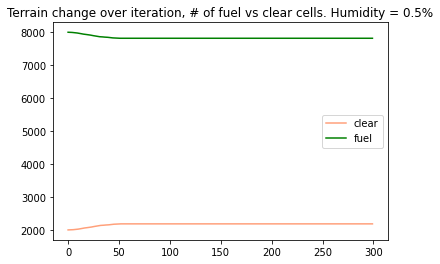

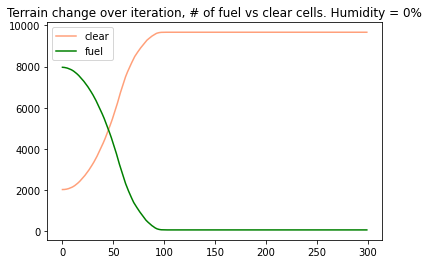

In [11]:
air_humidity = 0.5

states_hum = main(total_time,terrain_size,air_humidity)
states = main(total_time,terrain_size,0)

plt.figure()
plot_main(states_hum,air_humidity)
plt.figure()
plot_main(states, )
plt.show()



# Influência do vento na simulação de um incêncio


In [12]:
    
def main_wind(total_time,terrain_size,magnitude, direction):
    
    NY=([-1,-1,-1, 0,0, 1,1,1])
    NX=([-1, 0, 1,-1,1,-1,0,1])


    if magnitude<0.3:
        auxii=1
        auxi=1
    else:
        auxii=0.49*magnitude+0.5
        auxi=1-auxii

    # SUDESTE
    if direction == 'SE':
        NZ=([auxi,auxi,auxi,auxi,auxii,auxi,auxii,auxii])

    # NORDESTE
    if direction == 'NE':
        NZ=([auxi,auxi,auxi,auxii,auxi,auxii,auxii,auxi])
    
    # NOROESTE
    if direction == 'NW':
        NZ=([auxii,auxii,auxi,auxii,auxi,auxi,auxi,auxi])

    # SUDOESTE
    if direction == 'SW':
        NZ=([auxi,auxii,auxii,auxi,auxii,auxi,auxi,auxi])


    # Assigns value 0 to EMPTY, 1 to TREE, and 2 to FIRE. Each cell in the grid is 
    # assigned one of these values.
    EMPTY, TREE, FIRE = 0, 1, 2

    # Vai guardar a simulacao toda basicamente, vai ter t grelhas
    states = np.zeros((total_time,*terrain_size))

    # initialize states by creating random fuel and clear cells
    # Cria o estado inicial, cria matriz do tamanho da grelha c nr e probabilidades atribuidas
    states[0] = np.random.choice([0,1],size=terrain_size,p=[1-prob,prob])
    # O states[0] é o estado inicial

    # set the middle cell on fire!!!
    states[0,terrain_size[0]//2,terrain_size[1]//2] = 2

    for t in range(1,total_time):
    # Make a copy of the original states
        states[t] = states[t-1].copy()

        for x in range(1,terrain_size[0]-1):
            for y in range(1,terrain_size[1]-1):

                if states[t-1,x,y] == 2: # It's on fire
                    
                    for i in range(0,7):
                        if states[t-1,x+NX[i],y+NY[i]] == 1 and np.random.random() <= NZ[i]:
                            states[t,x+NX[i],y+NY[i]] = 2



                    states[t,x,y] = 0 # Put it out and clear it

                        

    return states 



# Plot Vento

In [18]:
colored = np.zeros((total_time,*terrain_size,3),dtype=np.uint8)

states= main_wind(total_time,terrain_size,0.5,'NE')

for t in range(states.shape[0]):
    for x in range(states[t].shape[0]):
            for y in range(states[t].shape[1]):
                value = states[t,x,y].copy()

                if value == 0:
                    colored[t,x,y] = [139,69,19] # Clear
                elif value == 1:
                    colored[t,x,y] = [0,255,0]   # Fuel
                elif value == 2:
                    colored[t,x,y] = [255,0,0]   # Burning


#cropped = colored[:200,1:terrain_size[0]-1,1:terrain_size[1]-1]

imageio.mimsave('./video_wind.gif', colored)

# Influência de um corta fogo na simulação de um incêncio (Por exemplo uma lagoa no mapa)


In [19]:
lake_position = [20,20]
lake_size = 300

    
def circular_lake(lake_position,lake_size):
    for i in range(terrain_size[0]):
        for j in range(terrain_size[1]):
            if (i-lake_position[0])**2+(j-lake_position[1])**2<lake_size:                
                states[0,i,j] = 4 #it's water
    return states

def corta_fogo(posicao,comprimento,largura):
    for i in range(terrain_size[0]):
        for j in range(terrain_size[1]):
            if (posicao[0]-comprimento//2 < i < posicao[0]+comprimento//2) and (posicao[1]-largura//2 < j < posicao[1]+largura//2):
                states[0,i,j] = 4 
    return states


#print(circular_lake(lake_position,lake_size))

def main_lake(total_time,terrain_size,lake_position, lake_size, air_humidity=0):
    states = np.zeros((total_time,*terrain_size))
    
    # initialize states by creating random fuel and clear cells
    states[0] = np.random.choice([0,1],size=terrain_size,p=[1-prob,prob])


    
    # set the middle cell on fire!!!
    states[0,terrain_size[0]//2,terrain_size[1]//2] = 2
    

    
    states = circular_lake(lake_position,lake_size)
    states = corta_fogo([50,70],80,10)    
    
    
    for t in range(1,total_time):
    # Make a copy of the original states
        states[t] = states[t-1].copy()

        for x in range(1,terrain_size[0]-1):
            for y in range(1,terrain_size[1]-1):

                if states[t-1,x,y] == 2: # It's on fire
                    states[t,x,y] = 0 # Put it out and clear it

                    # If there's fuel surrounding it
                    # set it on fire!
                    if states[t-1,x+1,y] == 1 and humidity(air_humidity)==1: 
                        states[t,x+1,y] = 2
                    if states[t-1,x-1,y] == 1 and humidity(air_humidity==1):
                        states[t,x-1,y] = 2
                    if states[t-1,x,y+1] == 1 and humidity(air_humidity==1):
                        states[t,x,y+1] = 2
                    if states[t-1,x,y-1] == 1 and humidity(air_humidity==1):
                        states[t,x,y-1] = 2

    #colored = np.zeros((total_time,*terrain_size,3),dtype=np.uint8)
    return states
    


# Plot Lago (tipo de corta fogo)

In [21]:
colored = np.zeros((total_time,*terrain_size,3),dtype=np.uint8)

states= main_lake(total_time,terrain_size,lake_position,lake_size ,0.65)

for t in range(states.shape[0]):
    for x in range(states[t].shape[0]):
            for y in range(states[t].shape[1]):
                value = states[t,x,y].copy()

                if value == 0:
                    colored[t,x,y] = [139,69,19] # Clear
                elif value == 1:
                    colored[t,x,y] = [0,255,0]   # Fuel
                elif value == 2:
                    colored[t,x,y] = [255,0,0]   # Burning
                elif value == 4:
                    colored[t,x,y] = [37,85,219] # water
                    


#cropped = colored[:200,1:terrain_size[0]-1,1:terrain_size[1]-1]

imageio.mimsave('./video_lake.gif', colored)

# Influência de diferentes tipos de madeira no desenvolvimento de um incêndio.

Most well known hardwoods such as mahogany, oak, maple and walnut are the ones with the highest fire resistance. Hardwoods are naturally more heat resistant due to their thickness and density. 

In this simulation we choose oak as the low burning wood, and eucaliptus as the fast burning wood

We consider that the 'eucaliptus_to_oak_ratio' is how many more eucaliptus there are compared to oak
and that the eucaliptus burns 'likely_to_burn' times more than the oak


- De forma a criar um mapa mais realista criámos uma floresta com ambos os tipos de árvore aleatóriamente distribuidas. 


- Observando o resultado vemos que a propagação do fogo é muito mais contida do que numa floresta com apenas eucaliptos (sldie numero 4).


- Podemos fácilmente concluir que a existência de árvores como o carvalho e a nogueira numa floresta é bastante importante na prevenção de propagação de incêndios.


In [22]:
def main_2type(total_time,terrain_size,air_humidity=0):
    # Prob de ser arvore 1
    prob_arv1=0.4
    # prob de ser arvore 2
    prob_arv2 = 0.4

    prob_arv2_arder = 0.5 # Prob de arv 2 arder
    #Assumimos que prob de arv 1 arder é 100% (eucalipto)

    # Vai guardar a simulacao toda basicamente, vai ter t grelhas
    states = np.zeros((total_time, *terrain_size))


    # Cria o estado inicial, cria matriz do tamanho da grelha c nr e probabilidades atribuidas 
    states[0] = np.random.choice([0,1,2],size=terrain_size,p=[1-prob_arv1-prob_arv2,prob_arv1,prob_arv2]) 

    #for i in range(terrain_size[0]):
    #    for j in range(terrain_size[1]):
    #        if j < (terrain_size[1])/2:
    #            states[0,i,j]=1
    #        else:
    #            states[0,i,j]=2


    # set the middle cell on fire!!!
    states[0,terrain_size[0]//2,terrain_size[1]//2] = 3

    for t in range(1,total_time):
    # Make a copy of the original states
        states[t] = states[t-1].copy()

        for x in range(1,terrain_size[0]-1):
            for y in range(1,terrain_size[1]-1):

                if states[t-1,x,y] == 3: # It's on fire
                    states[t,x,y] = 0 # Put it out and clear it
                    aux = np.random.uniform(0,1)
                    # If there's fuel surrounding it
                    # set it on fire!
                    if states[t-1,x+1,y] == 1 & humidity(air_humidity)==1: 
                        states[t,x+1,y] = 3
                    if states[t-1,x-1,y] == 1 & humidity(air_humidity)==1:
                        states[t,x-1,y] = 3
                    if states[t-1,x,y+1] == 1 & humidity(air_humidity)==1:
                        states[t,x,y+1] = 3
                    if states[t-1,x,y-1] == 1 & humidity(air_humidity)==1:
                        states[t,x,y-1] = 3
                    
                    if states[t-1,x+1,y] == 2 and aux < prob_arv2_arder and humidity(air_humidity)==1: 
                        states[t,x+1,y] = 3
                    if states[t-1,x-1,y] == 2 and aux < prob_arv2_arder and humidity(air_humidity)==1:
                        states[t,x-1,y] = 3
                    if states[t-1,x,y+1] == 2 and aux < prob_arv2_arder and humidity(air_humidity)==1:
                        states[t,x,y+1] = 3
                    if states[t-1,x,y-1] == 2 and aux < prob_arv2_arder and humidity(air_humidity)==1:
                        states[t,x,y-1] = 3 

    return states

In [43]:
colored = np.zeros((total_time,*terrain_size,3),dtype=np.uint8)

states = main_2type(total_time,terrain_size,air_humidity=0)

for t in range(states.shape[0]):
    for x in range(states[t].shape[0]):
            for y in range(states[t].shape[1]):
                value = states[t,x,y].copy()

                if value == 0:
                    colored[t,x,y] = [139,69,19] # Clear
                elif value == 1:
                    colored[t,x,y] = [0,255,0]   # Arvore 1
                elif value == 2:
                    colored[t,x,y] = [0,77,13]   # Arvore 2
                elif value == 3:
                    colored[t,x,y] = [255,0,0]   # Fogo
                elif value == 4:
                    colored[t,x,y] = [37,85,219] # water





imageio.mimsave('./coisa.gif', colored)

#  Modelo com diferentes variaveis: humidade, corta fogo e diferentes tipos de arvore

In [45]:
def main_tudo(total_time,terrain_size,air_humidity=0):
    # Prob de ser arvore 1
    prob_arv1=0.55
    # prob de ser arvore 2
    prob_arv2 = 0.35

    prob_arv2_arder = 0.5 # Prob de arv 2 arder
    #Assumimos que prob de arv 1 arder é 100% (eucalipto)

    # Vai guardar a simulacao toda basicamente, vai ter t grelhas
    states = np.zeros((total_time, *terrain_size))


    # Cria o estado inicial, cria matriz do tamanho da grelha c nr e probabilidades atribuidas 
    states[0] = np.random.choice([0,1,2],size=terrain_size,p=[1-prob_arv1-prob_arv2,prob_arv1,prob_arv2]) 

    

    # set the middle cell on fire!!!
    states[0,terrain_size[0]//2,terrain_size[1]//2] = 3


    states = circular_lake(lake_position,lake_size)
    states = corta_fogo([50,70],80,10)

    for t in range(1,total_time):
    # Make a copy of the original states
        states[t] = states[t-1].copy()

        for x in range(1,terrain_size[0]-1):
            for y in range(1,terrain_size[1]-1):

                if states[t-1,x,y] == 3: # It's on fire
                    states[t,x,y] = 0 # Put it out and clear it
                    aux = np.random.uniform(0,1)
                    # If there's fuel surrounding it
                    # set it on fire!
                    if states[t-1,x+1,y] == 1 & humidity(air_humidity)==1: 
                        states[t,x+1,y] = 3
                    if states[t-1,x-1,y] == 1 & humidity(air_humidity)==1:
                        states[t,x-1,y] = 3
                    if states[t-1,x,y+1] == 1 & humidity(air_humidity)==1:
                        states[t,x,y+1] = 3
                    if states[t-1,x,y-1] == 1 & humidity(air_humidity)==1:
                        states[t,x,y-1] = 3
                    
                    if states[t-1,x+1,y] == 2 and aux < prob_arv2_arder and humidity(air_humidity)==1: 
                        states[t,x+1,y] = 3
                    if states[t-1,x-1,y] == 2 and aux < prob_arv2_arder and humidity(air_humidity)==1:
                        states[t,x-1,y] = 3
                    if states[t-1,x,y+1] == 2 and aux < prob_arv2_arder and humidity(air_humidity)==1:
                        states[t,x,y+1] = 3
                    if states[t-1,x,y-1] == 2 and aux < prob_arv2_arder and humidity(air_humidity)==1:
                        states[t,x,y-1] = 3 

    return states

In [46]:
colored = np.zeros((total_time,*terrain_size,3),dtype=np.uint8)

states = main_tudo(total_time,terrain_size,air_humidity=0)

for t in range(states.shape[0]):
    for x in range(states[t].shape[0]):
            for y in range(states[t].shape[1]):
                value = states[t,x,y].copy()

                if value == 0:
                    colored[t,x,y] = [139,69,19] # Clear
                elif value == 1:
                    colored[t,x,y] = [0,255,0]   # Arvore 1
                elif value == 2:
                    colored[t,x,y] = [0,77,13]   # Arvore 2
                elif value == 3:
                    colored[t,x,y] = [255,0,0]   # Fogo
                elif value == 4:
                    colored[t,x,y] = [37,85,219] # water





imageio.mimsave('./tudo_junto.gif', colored)

# Conclusão

Foi possível criar um modelo de propagação de fogos utilizando o método de Monte Carlo.

Foi nos possível reconhecer a importância e impacto de variáveis como a humidade, a direção e magnitude do vento, a existência de lagos, rios, estradas e ou corta fogos como também a existência de diferente vegetação no terreno.

No futuro seria preciso “afinar” a probabilidades de propagação de acordo com valores reais de vento e humidade assim como adicionar diferentes variáveis ao nosso modelo como a existência de detritos inflamáveis e a diferença de elevação do terreno.

Posteriormente seria possível o uso deste modelo para estudo e simulação de zonas geográficas reais, com dados de vento e humidade reais.


# Referenciâs

[1] A Cellular Automaton Model of Wildfire Propagation and Extinction Keith C. Clarke, James A. Brass, and Philip J. Riggan

[2] Professor’s class notes 2021/22


# Agradecimentos

Um especial agradecimento à Professora Filomena Pinto dos Santos pela sua compreensão nos prazos de entrega deste trabalho, proporcionando assim a oportunidade de nos dedicarmos de forma séria ao projeto sem afetar a nossa performance académica tanto nesta cadeira como nas restantes do Mestrado.

